In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cf10 = keras.datasets.cifar10

In [3]:
(x_train,y_train), (x_test, y_test) = cf10.load_data()

In [4]:
x_train, x_test = x_train / 255., x_test / 255.

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=15, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 49s 987us/sample - loss: 1.4678 - accuracy: 0.4677 - val_loss: 1.0671 - val_accuracy: 0.6259
Epoch 2/10
50000/50000 [==============================] - 40s 808us/sample - loss: 1.0481 - accuracy: 0.6301 - val_loss: 0.9520 - val_accuracy: 0.6720
Epoch 3/10
50000/50000 [==============================] - 40s 809us/sample - loss: 0.8922 - accuracy: 0.6873 - val_loss: 0.8678 - val_accuracy: 0.6985
Epoch 4/10
50000/50000 [==============================] - 43s 853us/sample - loss: 0.8013 - accuracy: 0.7209 - val_loss: 0.7707 - val_accuracy: 0.7389
Epoch 5/10
50000/50000 [==============================] - 44s 872us/sample - loss: 0.7339 - accuracy: 0.7436 - val_loss: 0.7638 - val_accuracy: 0.7389
Epoch 6/10
50000/50000 [==============================] - 44s 872us/sample - loss: 0.6825 - accuracy: 0.7608 - val_loss: 0.7176 - val_accuracy: 0.7498
Epoch 7/10
50000/50000 [====================

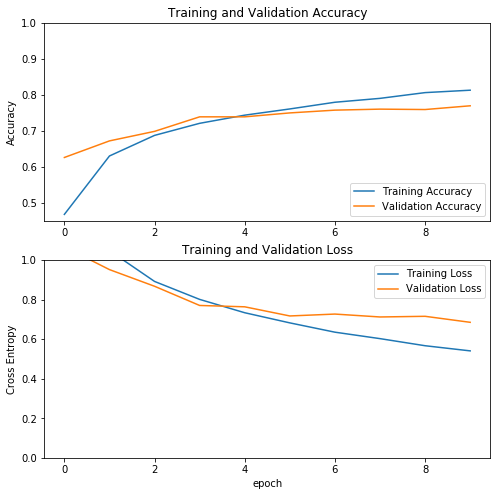

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()